In [1]:
import numpy as np
import matplotlib.pyplot as plt

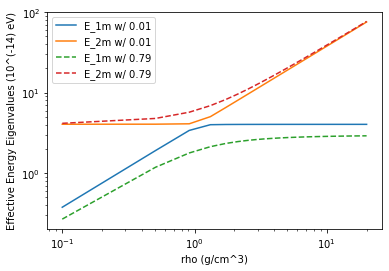

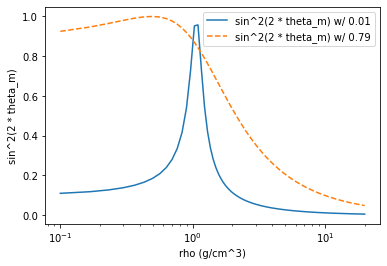

In [24]:
V = lambda rho: 7.56e-14 * 0.5 * rho

delmsq = 8.1e-5
E = 1e+9

def theta_vac(val):
    return np.arcsin(np.sqrt(val))/2

sinsq2vacs = [0.01, 0.79]

for index, sinsq2vac in enumerate(sinsq2vacs):
    def E_1m(rho):
        return (V(rho)/2) + (delmsq/(4 * E)) * (1 - np.sqrt(sinsq2vac + ( np.cos(2 * theta_vac(sinsq2vac)) - (2 * E * V(rho))/(delmsq) )**2))

    def E_2m(rho):
        return (V(rho)/2) + (delmsq/(4 * E)) * (1 + np.sqrt(sinsq2vac + ( np.cos(2 * theta_vac(sinsq2vac)) - (2 * E * V(rho))/(delmsq) )**2))
    
    x = np.linspace(0.1, 20, 50)
    y1 = E_1m(x) / 1e-14
    y2 = E_2m(x) / 1e-14
    
    if index % 2 == 0:
        plt.plot(x, y1, label=f'E_1m w/ {sinsq2vac}')
        plt.plot(x, y2, label=f'E_2m w/ {sinsq2vac}')
    else:
        plt.plot(x, y1, '--', label=f'E_1m w/ {sinsq2vac}')
        plt.plot(x, y2, '--', label=f'E_2m w/ {sinsq2vac}')

plt.yscale("log")
plt.xscale("log")

plt.xlabel("rho (g/cm^3)")
plt.ylabel("Effective Energy Eigenvalues (10^(-14) eV)")
plt.legend()
plt.show()

for index, sinsq2vac in enumerate(sinsq2vacs):
    def sin2thetam(rho):
        return np.sqrt(sinsq2vac)/np.sqrt(sinsq2vac + (np.cos(2 * theta_vac(sinsq2vac)) - (2 * E * V(rho))/(delmsq) )**2)
    
    x = np.linspace(0.1, 20, 300)
    y = sin2thetam(x)
    
    if index % 2 == 0:
        plt.plot(x, y, label=f'sin^2(2 * theta_m) w/ {sinsq2vac}')
    else:
        plt.plot(x, y, '--', label=f'sin^2(2 * theta_m) w/ {sinsq2vac}')

plt.xscale("log")

plt.xlabel("rho (g/cm^3)")
plt.ylabel("sin^2(2 * theta_m)")
plt.legend()
plt.show()